**Prediction of the Netflix Stock Market Price on the next day**

In [2]:
# Installing required packages
!pip install tensorflow
!pip install pandas
!pip install matplotlib

In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [5]:
#Data Pre-Processing

import pandas as pd
from tabulate import tabulate

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NFLX.csv")
#data = pd.read.csv("https://drive.google.com/file/d/18tehGphehA8Zf6zWBll2HLL-GRfreWoK/view?usp=share_link")
#print(tabulate(data, headers='keys', tablefmt='grid'))
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900


In [6]:
#Check for null values in the dataset
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
#Check for duplicate values in the dataset
data.duplicated().sum()

0

In [8]:
#Add a column with the stock prices of the next day
data['Next'] = data['Open'].shift(-1)

data.shape

(3119, 8)

In [9]:
#Check for null values in the dataset
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Next         1
dtype: int64

In [10]:
#Drop rows containing null values
data.dropna(axis=0, inplace=True)

In [11]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Next
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600,7.652857
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100,7.361429
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400,7.731429
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400,7.498571
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900,7.660000


In [12]:
#Remove irrelevant data columns
data = data.drop(['Date', 'Adj Close'], axis=1)
data.head()

,Open,High,Low,Close,Volume,Next
0,7.931429,7.961429,7.565714,7.640000,17239600,7.652857
1,7.652857,7.657143,7.258571,7.358571,23753100,7.361429
2,7.361429,7.672857,7.197143,7.617143,23290400,7.731429
3,7.731429,7.757143,7.462857,7.485714,9955400,7.498571
4,7.498571,7.742857,7.465714,7.614286,8180900,7.660000


In [13]:
#Obtaining X and Y data set
X = data.drop(['Next'], axis=1)
y = data['Next']

In [14]:
print(X.shape)
print(y.shape)

(3118, 5)
(3118,)


In [15]:
#Split data set as 80% for training and 20% for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building the Neural Network**

In [18]:
from tensorflow.keras.models import Sequential

#Model Creation
model = Sequential(
    [
        tf.keras.Input(shape=(5,), name="input"),
        tf.keras.layers.BatchNormalization(axis=-1),
        #Dense(512, activation='relu', name='L1'),
        #Dense(256, activation='relu', name='L2'),
        Dense(128, activation='relu', name='L3'),
        Dense(64, activation='relu', name='L4'),
        Dense(32, activation='relu', name='L5'),
        Dense(16, activation='relu', name='L6'),
        Dense(8, activation='relu', name='L7'),
        Dense(1, activation='linear', name='output'),
    ], name="my_model"
)

#Defining the loss function
loss_function = tf.keras.losses.MeanSquaredError()

#Select an appropriate optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

#Compilation
model.compile(optimizer=optimizer, loss=loss_function)

#Defining the batch size
BATCH_SIZE = 32

#Model fitting
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=20)


Epoch 1/20
78/78 [==============================] - 1s 2ms/step - loss: 60345.2109
Epoch 2/20
78/78 [==============================] - 0s 2ms/step - loss: 4486.3716
Epoch 3/20
78/78 [==============================] - 0s 2ms/step - loss: 2248.8909
Epoch 4/20
78/78 [==============================] - 0s 2ms/step - loss: 2387.4041
Epoch 5/20
78/78 [==============================] - 0s 2ms/step - loss: 2101.0989
Epoch 6/20
78/78 [==============================] - 0s 2ms/step - loss: 1896.4569
Epoch 7/20
78/78 [==============================] - 0s 2ms/step - loss: 2208.0051
Epoch 8/20
78/78 [==============================] - 0s 2ms/step - loss: 1617.1790
Epoch 9/20
78/78 [==============================] - 0s 2ms/step - loss: 2030.9266
Epoch 10/20
78/78 [==============================] - 0s 2ms/step - loss: 1612.9869
Epoch 11/20
78/78 [==============================] - 0s 2ms/step - loss: 1526.6796
Epoch 12/20
78/78 [==============================] - 0s 2ms/step - loss: 1518.8752
Epoch 13/20


In [19]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 5)                 20        
 chNormalization)                                                
                                                                 
 L3 (Dense)                  (None, 128)               768       
                                                                 
 L4 (Dense)                  (None, 64)                8256      
                                                                 
 L5 (Dense)                  (None, 32)                2080      
                                                                 
 L6 (Dense)                  (None, 16)                528       
                                                                 
 L7 (Dense)                  (None, 8)                 136       
                                                          

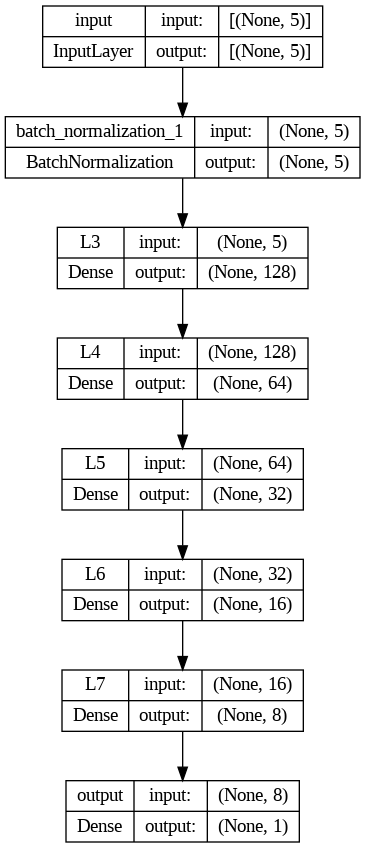

In [20]:
# plot the model
from keras.utils import plot_model

# plotting
plot_model(model, show_shapes=True, show_layer_names=True)

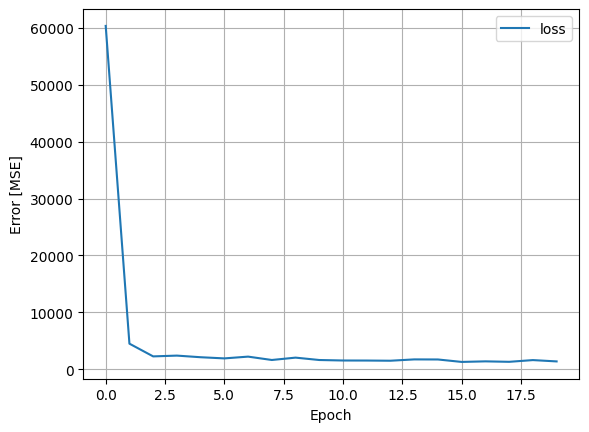

In [22]:
# Plot MSE vs. Epochs
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MSE]')
plt.legend()
plt.grid(True)